## Train ReLayNet
RunFile of OCT segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from pathlib import Path
#ECG: you will also need to install h5py in the conda env

from relaynet_pytorch.relay_net import ReLayNet
from relaynet_pytorch.data_utils import get_imdb_data

#originally commented out 
#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [2]:
##ECG
# path_dataset = Path("C:/Users/econtrerasguzman/Desktop/development/skala_lab/projects/placenta_oct_(Kayvan)/relaynet_pytorch-master/ecg_small_dataset")

# #original duke dataset --> Also working!
# path_dataset = Path("C:/Users/econtrerasguzman/Desktop/data/relaynet/2015_BOE_Chiu/h5")
# # suffix = '' # regular size 
# suffix = "_small" # reduced size for testing, 5 training 5 testing
# rows_slicing, cols_slicing = (130,642), ("start", "end")


## small oct dataset -- Working!
# path_dataset = Path("Z:/0-Projects and Experiments/KS - OCT membranes/oct_dataset_3100x256/0-other_files/h5_dataset_files/ecg_small_dataset")
# suffix = '_ecg'
# rows_slicing, cols_slicing = (100,"end"), (256, "end")


### Full oct dataset
path_dataset = Path("Z:/0-Projects and Experiments/KS - OCT membranes/oct_dataset_3100x256/0-h5")
suffix=""
rows_slicing, cols_slicing = (50,-50), ("start", "end")


train_data, test_data = get_imdb_data(path_dataset, suffix, row_slice=rows_slicing, col_slice=cols_slicing) #,row_upper_limit,column_lower_limit )

### ECG objects should have format: 
# X = (176, 1, 435, 768) [num_image, channel, rows, cols]
# y (176, 435, 768) [num_image, rows, cols]
# w (176, 10, 435, 768) [num_image, num_layers, rows, cols]
print(f"train X : {train_data.X.shape}")
print(f"train y : {train_data.y.shape}")
print(f"train w : {train_data.w.shape}")
###

print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

slicing: (50:-50, 0:512)
train X : (68, 1, 3000, 512)
train y : (68, 3000, 512)
train w : (68, 10, 3000, 512)
Train size: 68
Test size: 17


In [3]:
from relaynet_pytorch.relay_net import ReLayNet
from relaynet_pytorch.solver import Solver

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':3,
        'kernel_w':7,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class': 6 # ECG: was originally 9, oct has 6 (above placenta, decidua, chorion, spongy, amnion, below placenta)
    }

exp_dir_name = 'Exp01'

import sys
print(sys.version)

relaynet_model = ReLayNet(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(relaynet_model, train_loader, val_loader, log_nth=1, num_epochs=40, exp_dir_name=exp_dir_name)


### ECG
# in order to change conda environment in jupyter notebook you need to install nb_conda
####
#Scratch this, you need python 3.8 as this was resolved then
# in order to resolve: OverflowError: cannot serialize a bytes object larger than 4 GiB
# Update like 58
# C:\ProgramData\Anaconda3\lib\multiprocessing\reduction.py in dump(obj, file, protocol)
#      58 def dump(obj, file, protocol=4): # originallyit was this--> def dump(obj, file, protocol=None):
#      59     '''Replacement for pickle.dump() using ForkingPickler.'''
# ---> 60     #ForkingPickler(file, protocol).dump(obj)

# Source: https://stackoverflow.com/questions/29704139/pickle-in-python3-doesnt-work-for-large-data-saving
###
# First install visual studio
# Then Install CUDA toolkit
# https://developer.nvidia.com/cuda-downloads
###

C:\ProgramData\Anaconda3\envs\relaynet\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
cuda is available
START TRAIN.


C:\ProgramData\Anaconda3\envs\relaynet\lib\site-packages\torch\optim\lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torc

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
[Epoch : 33/40] : tensor(0.8416, device='cuda:0')
Saving model... models/Exp01/relaynet_

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
[Epoch : 36/40] : tensor(0.7436, device='cuda:0')
Saving model... models/Exp01/relaynet_epoch37.model
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1

X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
X size: torch.Size([1, 1, 3000, 512])
[Epoch : 39/40] : tensor(0.7412, device='cuda:0')
Saving model... models/Exp01/relaynet_epoch40.model
FINISH.


## Save the Model

When you are satisfied with your training, you can save the model.

In [4]:
relaynet_model.save("models/relaynet_model.model")

Saving model... models/relaynet_model.model


# Deploy Model on Test Data

In [5]:
SEG_LABELS_LIST = [
    {"id": -1, "name": "void", "rgb_values": [0, 0, 0]},
    {"id": 0, "name": "Region above the retina (RaR)", "rgb_values": [128, 0, 0]},
    {"id": 1, "name": "ILM: Inner limiting membrane", "rgb_values": [0, 128, 0]},
    {"id": 2, "name": "NFL-IPL: Nerve fiber ending to Inner plexiform layer", "rgb_values": [128, 128, 0]},
    {"id": 3, "name": "INL: Inner Nuclear layer", "rgb_values": [0, 0, 128]},
    {"id": 4, "name": "OPL: Outer plexiform layer", "rgb_values": [128, 0, 128]},
    {"id": 5, "name": "ONL-ISM: Outer Nuclear layer to Inner segment myeloid", "rgb_values": [0, 128, 128]},
    {"id": 6, "name": "ISE: Inner segment ellipsoid", "rgb_values": [128, 128, 128]},
    {"id": 7, "name": "OS-RPE: Outer segment to Retinal pigment epithelium", "rgb_values": [64, 0, 0]},
    {"id": 8, "name": "Region below RPE (RbR)", "rgb_values": [192, 0, 0]}];
    #{"id": 9, "name": "Fluid region", "rgb_values": [64, 128, 0]}];
    
def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1,2,0)
    for l in label_infos:
        mask = label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)

(1, 1, 3000, 512)
[  0 128] (3000, 512, 3)


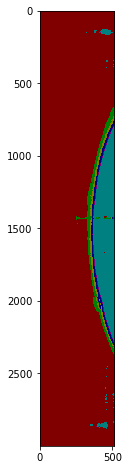

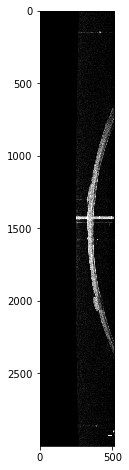

In [6]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch 

img_num = 14

with torch.no_grad():
    
    print(test_data.X[img_num:img_num+1,...].shape)

    relaynet_model =  torch.load('models/Exp01/relaynet_epoch20.model')
    #out = relaynet_model(Variable(torch.Tensor(test_data.X[0:1]).cuda(),volatile=True)) # originally 
    out = relaynet_model(torch.Tensor(test_data.X[img_num:img_num+1,...]).cuda())
    out = F.softmax(out,dim=1)
    max_val, idx = torch.max(out,1)
    idx = idx.data.cpu().numpy()
    idx = label_img_to_rgb(idx) # originaly commented in 
    idx = np.squeeze(idx) #ECG added 
    print(np.unique(idx), idx.shape)
    # plt.imshow(idx == 1) # show only one layer
    plt.imshow(idx)
    plt.show()

    img_test = test_data.X[img_num:img_num+1,...] 
    img_test = np.squeeze(img_test)
    plt.imshow(img_test)
    plt.show()